# Clustering Algorithm
**Purpose**: Given a list of (x,y) coordinates, label each point with the appropriate cluster label and output the ordered list of cluster labels.

**Not Covered**: higher dimension clustering (embedding data needs to be regenerated as they are unavailable at the moment)

# Density-based Clustering Algorithms

Pros
- No Need for Predefined Number of Clusters: Unlike algorithms like k-means, density-based clustering algorithms do not require the number of clusters to be specified in advance.
- Identification of Noise and Outliers: These algorithms can effectively identify and handle noise and outliers, marking them as separate from the main clusters.
- Clusters of Arbitrary Shape: Density-based algorithms can find clusters of arbitrary shapes, making them suitable for datasets with complex structures.
- Robust to Noise: They are robust to noise and can handle datasets with irregularities.
- Handling of Varying Cluster Sizes: Algorithms like HDBSCAN can handle clusters of varying densities, which is an improvement over the original DBSCAN.

Cons
- Parameter Sensitivity: The performance of density-based algorithms heavily depends on the choice of parameters such as ε (epsilon) and minPts. Incorrect parameter values can lead to poor clustering results.
- Difficulty with Varying Densities: DBSCAN struggles with datasets that have clusters of varying densities. While HDBSCAN addresses this issue, it is more complex and computationally intensive.
- High Dimensionality Issues: These algorithms can struggle with high-dimensional data due to the curse of dimensionality, which affects the distance metrics used.
- Computational Complexity: DBSCAN has a worst-case complexity of O(n²), which can be computationally expensive for large datasets. Although spatial indexing techniques can optimize this, it remains a concern.

## HDBSCAN (Hierarchical Density-Based Spatial Clustering of Applications with Noise)
An extension of DBSCAN (Density-Based Spatial Clustering of Applications with Noise) that can handle varying densities and hierarchical clustering. DBSCAN is a well-known density-based algorithm that groups closely packed points and marks points in low-density regions as outliers. Here are som

Pros
- Automatic Cluster Discovery: HDBSCAN does not require the user to specify the number of clusters beforehand, unlike DBSCAN which requires careful tuning of the epsilon (ε) parameter.
- Handling Varying Densities: HDBSCAN can handle clusters of varying densities more effectively than DBSCAN. It uses a hierarchical approach to identify clusters with different density levels, which DBSCAN struggles with.
- Robustness to Noise: HDBSCAN is generally more robust to noise and outliers compared to DBSCAN. It is more prudent in assigning noisy data points to clusters, reducing the likelihood of false clustering.
- Stability: HDBSCAN is stable over runs and subsampling, maintaining consistent clustering results with the same parameter choices. This stability is a significant advantage over DBSCAN.
- Intuitive Parameters: HDBSCAN replaces the ε parameter with a more intuitive parameter, `min_cluster_size`, which is easier to set based on the minimum size of clusters of interest.

Cons
- Computational Complexity: HDBSCAN can be more computationally intensive than DBSCAN, especially for large datasets. This is due to the hierarchical clustering process and the need to calculate mutual reachability distances.
- Higher Memory Usage: HDBSCAN has a higher memory complexity compared to DBSCAN, which can be a limitation when working with very large datasets.
- Parameter Sensitivity: Although HDBSCAN is less sensitive to parameter settings than DBSCAN, it still requires careful tuning of parameters like `min_cluster_size` and `min_samples`, which can influence the clustering results.

### Notes
In addition to the output `labels_`, HDBSCAN provides a `probabilities_` attribute which assigns a cluster membership probability to each data point. This probability ranges from 0.0 to 1.0, where 0.0 indicates that the point is considered noise, and 1.0 indicates that the point is at the core of the cluster. 

This feature allows for a soft clustering approach, where each point has a degree of belonging to a cluster rather than a hard assignment. In contrast, k-means clustering does not provide a similar probability attribute. K-means assigns each data point to the nearest cluster centroid, resulting in hard clustering

In [1]:
# set up
%pip install matplotlib
%pip install hdbscan

# beautify
%pip install seaborn


[notice] A new release of pip is available: 23.0.1 -> 24.0
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.

[notice] A new release of pip is available: 23.0.1 -> 24.0
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.

[notice] A new release of pip is available: 23.0.1 -> 24.0
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import csv
import hdbscan
import seaborn as sns

In [3]:
# load 2D coordinate data
def load_2d_points(filename, delimiter, x_idx, y_idx, skip_header=True):
    with open(filename, 'r', newline='') as file:
        reader = csv.reader(file, delimiter=delimiter)
        if skip_header:
            next(reader)
        points = [(float(row[x_idx]), float(row[y_idx])) for row in reader]
    return np.array(points)

points = load_2d_points('./testdata/PD1-46k.tsv', '\t', -2, -1)

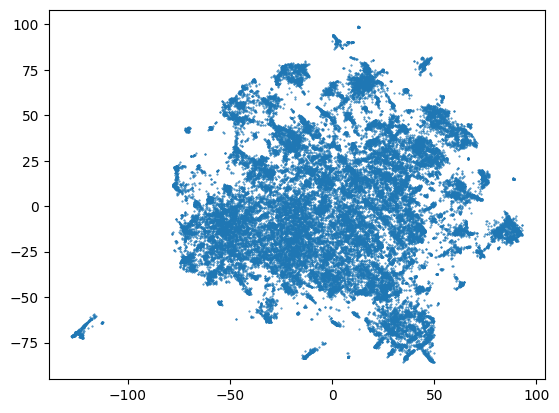

In [4]:
plt.scatter(points[:,0], points[:,1], s=.2)
plt.show()

## HDBSCAN impl

# Clustering Algorithm
**Purpose**: Given a list of (x,y) coordinates, label each point with the appropriate cluster label and output the ordered list of cluster labels.

**Not Covered**: higher dimension clustering (embedding data needs to be regenerated as they are unavailable at the moment)

In [6]:
# SMALLER MIN_CLUSTER_SIZE RESULTS IN HIGHER NUMBER OF NOISE POINTS
# SETTING min_samples < min_cluster_size SEEMS FAVORABLE TO REDUCE NOISE POINTS (anomaly at 150)
# min_cluster_size = [5, 10, 15, 20, 50, 75, 90, 100, 150, 200, 350, 500]

# noise_point_cnt = []
# for s in min_cluster_size:
#     clusterer = hdbscan.HDBSCAN(min_cluster_size=s)
#     labels = clusterer.fit_predict(points)
#     noise_point_cnt.append(sum(labels == -1))
# plt.scatter(min_cluster_size, noise_point_cnt, color='r', label='min_cluster_size=min_samples')

# noise_point_cnt = []
# for s in min_cluster_size:
#     clusterer = hdbscan.HDBSCAN(min_cluster_size=s, min_samples=int(s/2))
#     labels = clusterer.fit_predict(points)
#     noise_point_cnt.append(sum(labels == -1))
# plt.scatter(min_cluster_size, noise_point_cnt, color='b', label='min_cluster_size=2*min_samples')

# plt.legend()

# plt.title('noise_point_cnt vs. min_cluster_size')
# plt.show()

In [7]:
# SMALLER MIN_CLUSTER_SIZE RESULTS IN HIGHER NUMBER OF NOISE POINTS
# SETTING min_samples < min_cluster_size SEEMS FAVORABLE TO REDUCE NOISE POINTS
# min_cluster_size = [5, 10, 15, 20, 50, 75, 90, 100, 150]

# noise_point_cnt = []
# for s in min_cluster_size:
#     clusterer = hdbscan.HDBSCAN(min_cluster_size=s)
#     labels = clusterer.fit_predict(points)
#     noise_point_cnt.append(sum(labels == -1))
# plt.scatter(min_cluster_size, noise_point_cnt, color='r', alpha=0.5, label='min_samples=min_cluster_size')

# noise_point_cnt = []
# for s in min_cluster_size:
#     clusterer = hdbscan.HDBSCAN(min_cluster_size=s, min_samples=int(0.8*s))
#     labels = clusterer.fit_predict(points)
#     noise_point_cnt.append(sum(labels == -1))
# plt.scatter(min_cluster_size, noise_point_cnt, color='g', alpha=0.5,  label='min_samples=0.8*min_cluster_size')

# noise_point_cnt = []
# for s in min_cluster_size:
#     clusterer = hdbscan.HDBSCAN(min_cluster_size=s, min_samples=int(0.5*s))
#     labels = clusterer.fit_predict(points)
#     noise_point_cnt.append(sum(labels == -1))
# plt.scatter(min_cluster_size, noise_point_cnt, color='b', alpha=0.5,  label='min_samples=0.5*min_cluster_size')

# noise_point_cnt = []
# for s in min_cluster_size:
#     clusterer = hdbscan.HDBSCAN(min_cluster_size=s, min_samples=int(0.3*s))
#     labels = clusterer.fit_predict(points)
#     noise_point_cnt.append(sum(labels == -1))
# plt.scatter(min_cluster_size, noise_point_cnt, color='m', alpha=0.5,  label='min_samples=0.3*min_cluster_size')


# plt.legend()

# plt.title('noise_point_cnt vs. min_cluster_size')
# plt.show()

In [25]:
# SHORTLISTED LEVELS
hdbscan_params_by_level = {
    # fine-grain
    1.1: {'min_cluster_size':5, 'min_samples':3},
    1.2: {'min_cluster_size':20, 'min_samples':10},
    # medium-grain
    2.1: {'min_cluster_size':40, 'min_samples':20},
    2.2: {'min_cluster_size':80, 'min_samples':24},
    # coarse-grain
    3.1: {'min_cluster_size':100, 'min_samples':30},
    3.2: {'min_cluster_size':125, 'min_samples':125},
}
plot_kwds = {'s' : 0.2, 'alpha': 0.5}

In [39]:
def get_point_colors(labels, probabilities):
    palette = sns.color_palette(n_colors=np.unique(labels).max() + 1)
    return [
        sns.desaturate(palette[label], sat) if label >= 0 else (0.75, 0.75, 0.75) for label, sat in zip(labels, probabilities)
    ]

In [48]:
def cluster_by_hdbscan(points, params):
    clusterer = hdbscan.HDBSCAN(**params)
    clusterer.fit(points)

    df = pd.DataFrame(points, columns=['x', 'y'])
    df['labels'] = clusterer.labels_
    df['probabilities'] = clusterer.probabilities_
    
    # Calculate the weighted average for each cluster
    weighted_mean = lambda x: np.average(x, weights=df.loc[x.index, 'probabilities'])
    cluster_centers = df[df['labels'] != -1].groupby('labels').agg({'x': weighted_mean, 'y': weighted_mean}).reset_index()

    return clusterer.labels_, clusterer.probabilities_, cluster_centers

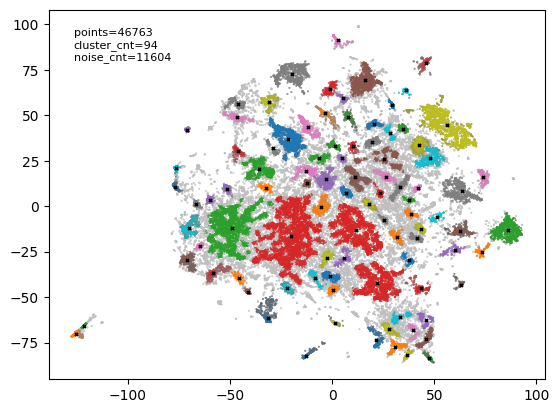

In [56]:
%matplotlib inline

labels, probs, centers = cluster_by_hdbscan(points, hdbscan_params_by_level[3.1])
colors = get_point_colors(labels, probs)
plt.scatter(points[:,0], points[:,1], c=colors, **plot_kwds)

# add helpful statistics
cluster_cnt = len(set(labels)) - (-1 in labels)
noise_cnt = sum(labels == -1)

plt.text(
    0.05, 
    0.95, 
    f"points={len(labels)}\ncluster_cnt={cluster_cnt}\nnoise_cnt={noise_cnt}\n",
    fontsize=8,
    verticalalignment='top',
    transform=plt.gca().transAxes,
)

for _, center in centers.iterrows():
    plt.scatter(center['x'], center['y'], c='black', marker='x', s=1, linewidths=3)

plt.show()

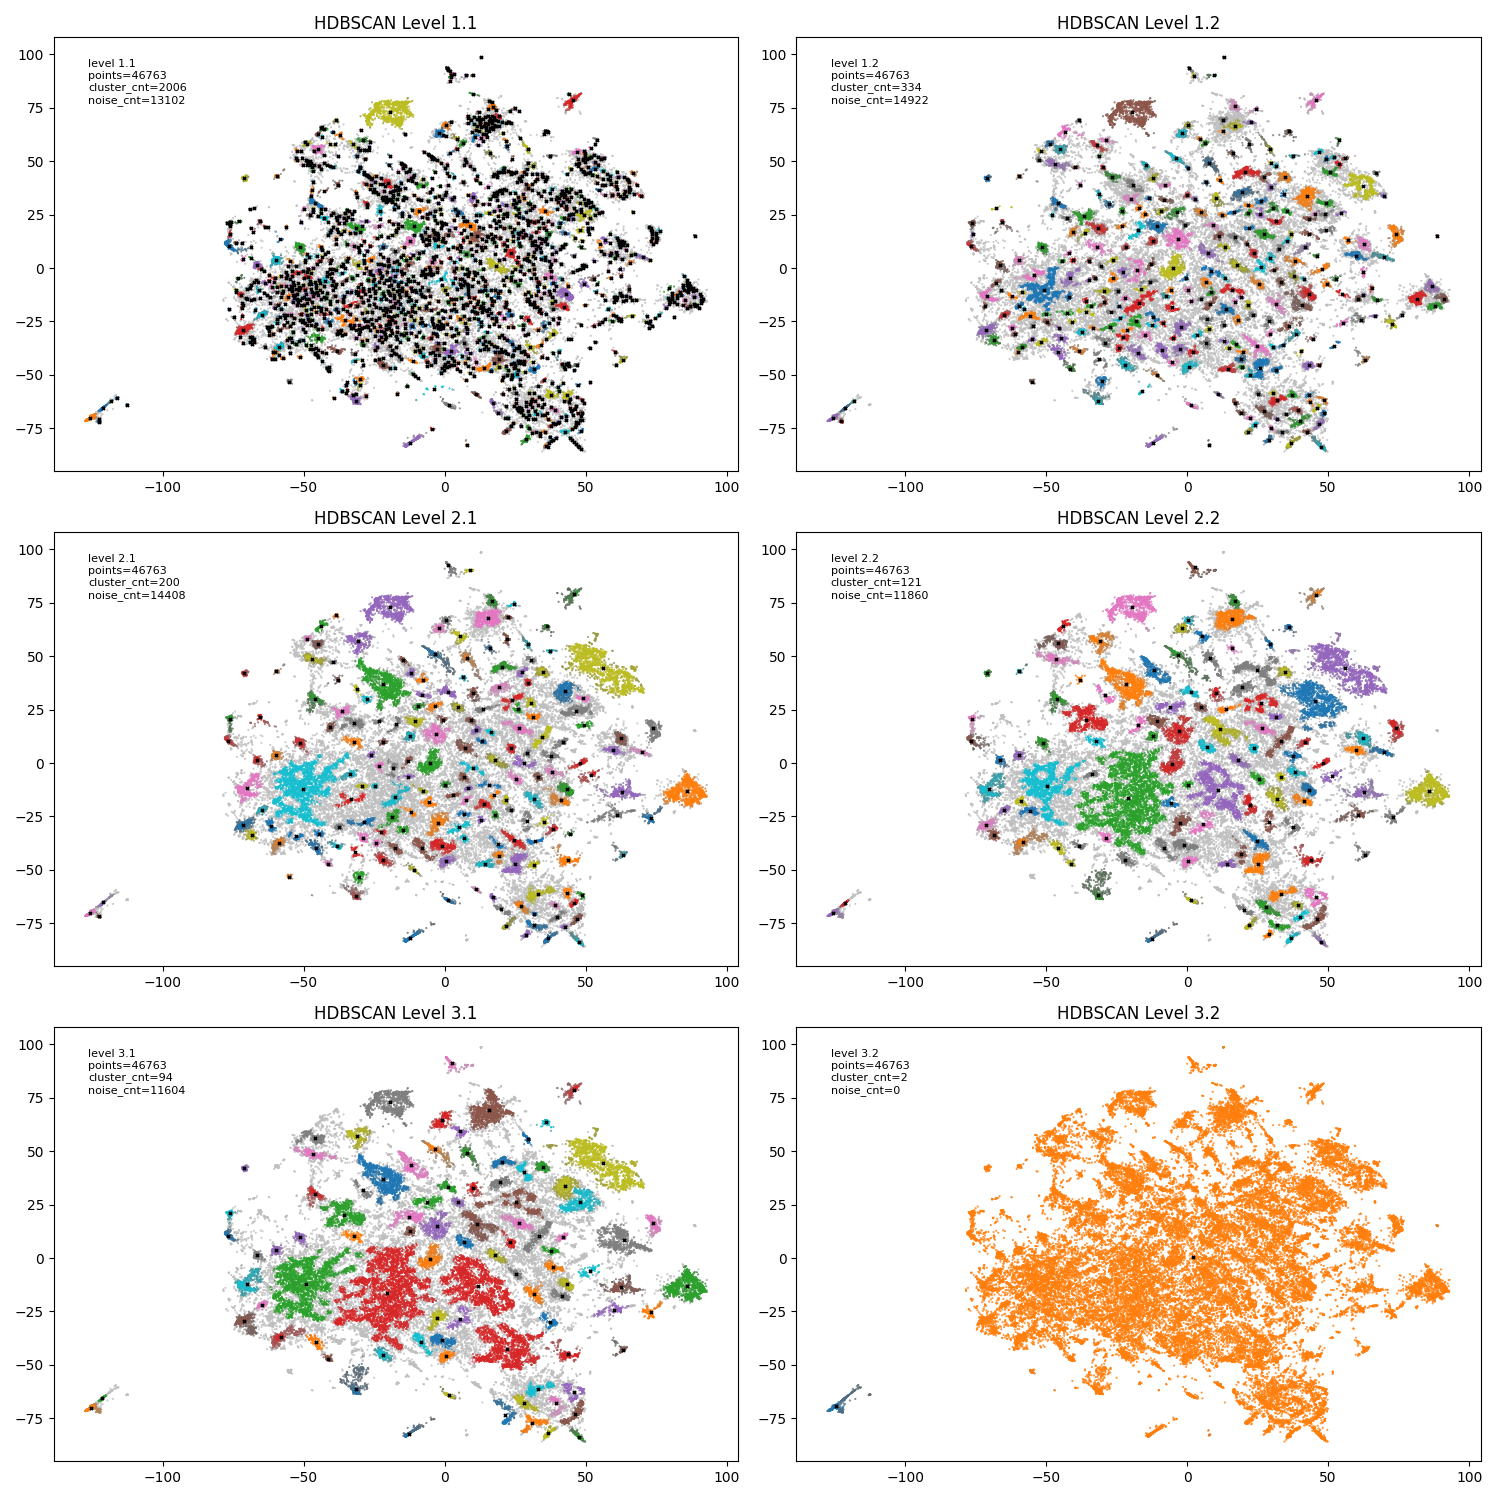

In [57]:
# Create subplots
%matplotlib widget
fig, axes = plt.subplots(3, 2, figsize=(15, 15))
axes = axes.flatten()

for i, (level, params) in enumerate(hdbscan_params_by_level.items()):
    labels, probs, centers = cluster_by_hdbscan(points, params)
    colors = get_point_colors(labels, probs)    
    axes[i].scatter(points[:, 0], points[:, 1], c=colors, **plot_kwds)
    
    # Add helpful statistics
    cluster_cnt = len(set(labels)) - (-1 in labels)
    noise_cnt = sum(labels == -1)
    axes[i].text(
        0.05, 
        0.95, 
        f"level {level}\npoints={len(labels)}\ncluster_cnt={cluster_cnt}\nnoise_cnt={noise_cnt}\n",
        fontsize=8,
        verticalalignment='top',
        transform=axes[i].transAxes,
    )

    for _, center in centers.iterrows():
        axes[i].scatter(center['x'], center['y'], c='black', marker='x', s=1, linewidths=3)
    
    axes[i].set_title(f'HDBSCAN Level {level}')

# Adjust layout
plt.tight_layout()
plt.show()

Above diagram displays the clusters formed with the following hyperparameters
```python
hdbscan_params_by_level = {
    # fine-grain
    1.1: {'min_cluster_size':5, 'min_samples':3},
    1.2: {'min_cluster_size':20, 'min_samples':10},
    # medium-grain
    2.1: {'min_cluster_size':40, 'min_samples':20},
    2.2: {'min_cluster_size':80, 'min_samples':24},
    # coarse-grain
    3.1: {'min_cluster_size':100, 'min_samples':30},
    3.2: {'min_cluster_size':125, 'min_samples':125},
}
```

## Notable Points
- Although HDBSCAN is less sensitive to changes in parameters than DBSCAN, we can see that the choice of parameter can significantly impact the clustering. (see 3.1 vs. 3.2)
- It's kind of difficult to get a sense of which parameter values will produce the appropriate clusters. (see 3.2)
- There's a high level of noise (regardless of min_cluster_size, min_samples). Is that acceptable? Or is it preferred that most points belong to a cluster?
[noise vs. min_cluster_size](assets/HDBSCAN_noise_vs_minclustersize.png)
    - Proportion of noise points is also highly dependent on the output of the embedding. If the embedding (& dimension reduction) does a better job putting closely related (MeSH term-wise, in above example) points nearer to each other, the level of noise may be reduced.
- Further Considerations
    - Do we set fixed parameter values that are defined by the product? (e.g. a cluster of points/papers must be at least size 10; absolute value) 
    - Should the users have the ability to tune the parameters? (probably not - at least for the scope of the first release)
    - Should we dynamically define the appropriate parameter values for each point map by having a defined # of cluster for each zoom level? (may be counter-intuitive to use HDBSCAN which is a preferred method of clustering when you do not wish to define the # of clusters)

# KMeans Clustering

- KMeans assumes spherical clusters. This makes HDBSCAN better suited for datasets with irregularly shaped clusters.
- HDBSCAN can automatically identify outliers and noise points that do not belong to any cluster. K-means will assign every data point to a cluster, even if it is an outlier.
- HDBSCAN does not require specifying the number of clusters upfront, which can be an advantage when this number is unknown

### When to Use K-Means Clustering
- Spherical Clusters: If the clusters in the data are roughly spherical and of similar density, k-means can work well and is simpler to implement than DBSCAN.
- Efficiency on Large Datasets: K-means is generally more computationally efficient than DBSCAN, especially on very large datasets.
- Prior Knowledge of K: If you have prior knowledge or can estimate the number of clusters (K) reasonably well, k-means can give good results.

Consider SEC
https://ojs.aaai.org/index.php/AAAI/article/view/29152